# Homework Lecture5

LDA and Logistic Classification and Feature Development with the  MNIST image dataset

## Preliminaries

### Imports

In [45]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split, KFold
import sys
sys.path.append("../..")
from E4525_ML import mnist
from E4525_ML.multiclass_logistic import LogisticGDClassifier as LGC
%matplotlib inline
import gzip

### Random Seed

In [2]:
seed=458
np.random.seed(seed)

### Data Directories

In [12]:
data_dir=r"../raw/mnist/"

<div class="alert alert-block alert-info"> Problem 0 </div>
Make sure to **update** the file `mnist.py` on the `E4525_ML` directory (new version posted on Canvas).

You will need the **updated** version of that file to complete the last section of this notebook.

Done!

## Read Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Read MNIST data set and labels,  also read the MNMIST test data set and test labels

In [66]:
images_filename=data_dir+"train-images-idx3-ubyte.gz"
labels_filename=data_dir+"train-labels-idx1-ubyte.gz"
test_images_filename=data_dir+"t10k-images-idx3-ubyte.gz"
test_labels_filename=data_dir+"t10k-labels-idx1-ubyte.gz"
images=mnist.read_images(images_filename)
labels=mnist.read_labels(labels_filename)    
test_images=mnist.read_images(test_images_filename)
test_labels=mnist.read_labels(test_labels_filename)    
print(images.shape,labels.shape)

(60000, 28, 28) (60000,)


<div class="alert alert-block alert-info"> Problem 1.2 </div>
Use `skelearn`'s `train_test_split` function to separate the MNIST samples into  a 15% validation set and a  training sample.


In [67]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [68]:
X_train.shape

(43350, 28, 28)

In [69]:
X_val.shape

(7650, 28, 28)

## LDA

<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit an LDA model on the training data set using `sklearns` `LinearDiscriminantAnalysis` classifier 

In [18]:
clf = LDA()

In [22]:
clf.fit(X_train.reshape(43350,-1),y_train)

C:\Users\jpgur\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Compute model accuracy on the training set

In [23]:
Y_pred=clf.predict(X_train.reshape(43350,-1))

In [24]:
"Training accuracy",np.mean(Y_pred==y_train)

('Training accuracy', 0.8733794694348328)

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Compute accuracy of the model on the validation set

In [26]:
Y_valpred=clf.predict(X_val.reshape(7650,-1))

In [27]:
"Validation accuracy",np.mean(Y_valpred==y_val)

('Validation accuracy', 0.8606535947712418)

## Logistic Regression

<div class="alert alert-block alert-info"> Problem 3.1 </div>

Use the `LogisticGDClassifier` class from `E4525_ML.multiclass_logistic` module to fit a logistic model

In [30]:
model = LGC()

In [31]:
model.fit(X_train.reshape(43350,-1),y_train)

2019-11-06 20:00:07|	0: TRAIN loss 2.3974,  acc 0.0450
2019-11-06 20:00:08|	10: TRAIN loss 0.2073,  acc 0.9420
2019-11-06 20:00:10|	20: TRAIN loss 0.1884,  acc 0.9550
2019-11-06 20:00:11|	30: TRAIN loss 0.2090,  acc 0.9460
2019-11-06 20:00:13|	40: TRAIN loss 0.2228,  acc 0.9330
2019-11-06 20:00:14|	50: TRAIN loss 0.2326,  acc 0.9390
2019-11-06 20:00:15|	60: TRAIN loss 0.2866,  acc 0.9270
2019-11-06 20:00:17|	70: TRAIN loss 0.1874,  acc 0.9440
2019-11-06 20:00:18|	80: TRAIN loss 0.2336,  acc 0.9290
2019-11-06 20:00:20|	90: TRAIN loss 0.1790,  acc 0.9540
2019-11-06 20:00:21|	99: TRAIN loss 0.2310,  acc 0.9380


<div class="alert alert-block alert-info"> Problem 3.2 </div>
Compute model accuracy in the training data set

In [32]:
Y_pred_LGC=model.predict(X_train.reshape(43350,-1))

In [33]:
"Training accuracy",np.mean(Y_pred_LGC==y_train)

('Training accuracy', 0.9378316032295271)

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Compute model accuracy in the valuation data set

In [34]:
Y_valpred_LGC=model.predict(X_val.reshape(7650,-1))

In [35]:
"Validation accuracy",np.mean(Y_valpred_LGC==y_val)

('Validation accuracy', 0.9158169934640523)

## Feature Engineering in one Dimension

In [36]:
N=50
N_val=1000

In [37]:
def f(x):
    return 10*(1-4*(np.abs(np.abs(x)-1)))

In [48]:
def generate_sample(N):
    X=np.random.uniform(-2,2,N)
    eta=f(X)
    eta.shape
    theta=1/(1+np.exp(-eta))
    Y= np.random.uniform(0,1,N)>theta
    return X,Y

<div class="alert alert-block alert-info"> Problem 4.0 </div>
Generate 
1. a training sample of variables $X$ and $Y$ with $N$ data samples
2. a valuation set with   $N_{val}$ samples
3. a test set with $N_{val}$ samples

In [97]:
X,Y = generate_sample(N)

In [98]:
X_val, Y_val = generate_sample(N_val)

In [99]:
X_test, Y_test = generate_sample(N_val)

<div class="alert alert-block alert-info"> Problem 4.1 </div>
What is the proportion of positive class ($Y=1$) samples on the training data?

In [100]:
"Proportion of Positive Classes",np.mean(Y==1)

('Proportion of Positive Classes', 0.76)

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Write a function able to generate the feature matrix
$$
    H_{i,d}= h_d(x_i)
$$
for $i=1,\dots N$ and $d=1,\dots D$

where the functions $h_d(x)$ are defined as 
$$
    h_d(x) = x^d
$$

[HINT] be careful to include $h_D$ in the range of functions

In [111]:
def generate_feature_matrix(i,D,X):
    H = []
    for k in range(i):
        H.append(np.power(X[k],D))
    return np.asarray(H)

<div class="alert alert-block alert-info"> Problem 4.3 </div>
1. Train  a logistic regression model (use sklearn `LogisticRegression` class) over the training data you already generated. 
2. Use the valuation set  to select the best value of $D$ using accuracy as selection criteria.
3. Plot accuracy on the  training and valuation sets as a function of $D$.

[HINT]
1. You only need to consider the range $D=1,\dots 10$.
2. Remember to disable regularization by setting the parameter $C$ of the `LogisticRegression` class to a very large number.



In [102]:
model_LR = LR(C=99999999999)

In [103]:
x = X.reshape(-1, 1)

In [104]:
#y = Y.reshape(-1,1)

In [197]:
model_LR.fit(x,Y)

C:\Users\jpgur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=99999999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [146]:
d1 = generate_feature_matrix(N_val,1,X_val)
d1_train = generate_feature_matrix(N,1,X)

In [196]:
#model_LR.fit(d1_train.reshape(-1,1),Y)

In [187]:
d1_pred = model_LR.predict(d1.reshape(-1, 1))
d1_train_pred = model_LR.predict(d1_train.reshape(-1, 1))

In [188]:
print("Validation Accuracy ",np.mean(d1_pred==Y_val))
print("Training Accuracy ",np.mean(d1_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [149]:
d2 = generate_feature_matrix(N_val,2,X_val)
d2_train = generate_feature_matrix(N,2,X)

In [198]:
#model_LR.fit(d2_train.reshape(-1,1),Y)

In [190]:
d2_pred = model_LR.predict(d2.reshape(-1, 1))
d2_train_pred = model_LR.predict(d2_train.reshape(-1, 1))

In [191]:
print("Validation Accuracy ",np.mean(d2_pred==Y_val))
print("Training Accuracy ",np.mean(d2_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [152]:
d3 = generate_feature_matrix(N_val,3,X_val)
d3_train = generate_feature_matrix(N,3,X)

In [195]:
#model_LR.fit(d3_train.reshape(-1,1),Y)

In [194]:
print("Validation Accuracy ",np.mean(d3_pred==Y_val))
print("Training Accuracy ",np.mean(d3_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [193]:
d3_pred = model_LR.predict(d3.reshape(-1, 1))
d3_train_pred = model_LR.predict(d3_train.reshape(-1, 1))

In [155]:
d4 = generate_feature_matrix(N_val,4,X_val)
d4_train = generate_feature_matrix(N,4,X)

In [156]:
d4_pred = model_LR.predict(d4.reshape(-1, 1))
d4_train_pred = model_LR.predict(d4_train.reshape(-1, 1))

In [157]:
print("Validation Accuracy ",np.mean(d4_pred==Y_val))
print("Training Accuracy ",np.mean(d4_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [158]:
d5 = generate_feature_matrix(N_val,5,X_val)
d5_train = generate_feature_matrix(N,5,X)

In [159]:
d5_pred = model_LR.predict(d5.reshape(-1, 1))
d5_train_pred = model_LR.predict(d5_train.reshape(-1, 1))

In [160]:
print("Validation Accuracy ",np.mean(d5_pred==Y_val))
print("Training Accuracy ",np.mean(d5_train_pred==Y))

Validation Accuracy  0.619
Training Accuracy  0.6


In [165]:
d6 = generate_feature_matrix(N_val,6,X_val)
d6_train = generate_feature_matrix(N,6,X)

In [166]:
d6_pred = model_LR.predict(d6.reshape(-1, 1))
d6_train_pred = model_LR.predict(d6_train.reshape(-1, 1))

In [167]:
print("Validation Accuracy ",np.mean(d6_pred==Y_val))
print("Training Accuracy ",np.mean(d6_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [168]:
d7 = generate_feature_matrix(N_val,7,X_val)
d7_train = generate_feature_matrix(N,7,X)

In [169]:
d7_pred = model_LR.predict(d7.reshape(-1, 1))
d7_train_pred = model_LR.predict(d7_train.reshape(-1, 1))

In [170]:
print("Validation Accuracy ",np.mean(d7_pred==Y_val))
print("Training Accuracy ",np.mean(d7_train_pred==Y))

Validation Accuracy  0.588
Training Accuracy  0.54


In [171]:
d8 = generate_feature_matrix(N_val,8,X_val)
d8_train = generate_feature_matrix(N,8,X)

In [172]:
d8_pred = model_LR.predict(d8.reshape(-1, 1))
d8_train_pred = model_LR.predict(d8_train.reshape(-1, 1))

In [173]:
print("Validation Accuracy ",np.mean(d8_pred==Y_val))
print("Training Accuracy ",np.mean(d8_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [175]:
d9 = generate_feature_matrix(N_val,9,X_val)
d9_train = generate_feature_matrix(N,9,X)

In [176]:
d9_pred = model_LR.predict(d9.reshape(-1, 1))
d9_train_pred = model_LR.predict(d9_train.reshape(-1, 1))

In [177]:
print("Validation Accuracy ",np.mean(d9_pred==Y_val))
print("Training Accuracy ",np.mean(d9_train_pred==Y))

Validation Accuracy  0.594
Training Accuracy  0.54


In [178]:
d10 = generate_feature_matrix(N_val,10,X_val)
d10_train = generate_feature_matrix(N,10,X)

In [179]:
d10_pred = model_LR.predict(d10.reshape(-1, 1))
d10_train_pred = model_LR.predict(d10_train.reshape(-1, 1))

In [180]:
print("Validation Accuracy ",np.mean(d10_pred==Y_val))
print("Training Accuracy ",np.mean(d10_train_pred==Y))

Validation Accuracy  0.764
Training Accuracy  0.76


In [181]:
B = [0.764,0.764,0.688,0.764,0.619,0.764,0.588,0.764,0.594,0.764]
C = [1,2,3,4,5,6,7,8,9,10]
D = [0.76,0.76,0.64,0.76,0.6,0.76,0.54,0.76,0.54,0.76]

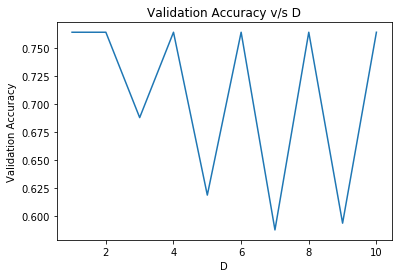

In [145]:
plt.plot(C,B)
plt.xlabel('D')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy v/s D')
plt.show()

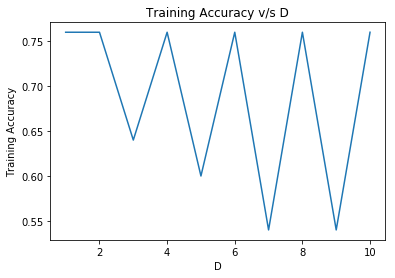

In [182]:
plt.plot(C,D)
plt.xlabel('D')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy v/s D')
plt.show()

<div class="alert alert-block alert-info"> Problem 4.4 </div>
Use the test set  to measure the accuracy for the optimal classifier you have found
(do not use data from the  valuation set to train the classifier)

Since we have multiple classifiers with an accuracy of 0.764, we will choose D=1 as our optimal value

In [200]:
d1_test = generate_feature_matrix(N_val,1,X_test)

In [202]:
d1_test_pred = model_LR.predict(d1_test.reshape(-1, 1))

In [203]:
print("Test Accuracy ",np.mean(d1_test_pred==Y_test))

Test Accuracy  0.772


## Feature Engineering for MNIST sample

<div class="alert alert-block alert-info"> Problem 5.1 </div>
In this problem we will use `mnist.ImageFeatureModel` class to find the optimal number of orientations $\theta$  of the oriented gradients
features for the MNIST data set.

1. use `mnist.ImageFeatureModel` to generate image oriented gradient features.
2. use  `LogisticGDClassifier` as the base model
3. set the block size to 4 ( this is to reduce memory use)
4. select the best number of orientations by performing  5-Fold cross-validation on the full MNIST data set.
5. Consider only [1,2,4,8] as possible values for the orientation
6. Plot number of orientations vs validation accuracy

[HINT] 
1. the `validation_model` function below will be useful to perform cross-validation
2. If you run into memory trouble (your computer crashes), reduce the size of the data set.
Make sure to  indicate this clearly on your solution.
3. This problem is computationally expensive, make sure to allocate time to resolve it.

In [60]:
def validate_model(model,K,X,Y):
    folder=KFold(K,shuffle=True)
    folds=folder.split(X,Y)
    val_error=0.0
    fold_count=0
    for fold in folds:
        train_idx,val_idx=fold
        x_train=X[train_idx]
        y_train=Y[train_idx]
        x_val=X[val_idx]
        y_val=Y[val_idx]     
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        val_err=np.mean(y_val==y_pred)
        val_error+=val_err
        fold_count+=1
        print(fold_count,val_err)
    return val_error/K
      

In [62]:
model_LGDC = LGC()

In [71]:
model_LGDC.fit(images.reshape(60000,-1),labels)

2019-11-06 22:36:01|	0: TRAIN loss 2.4250,  acc 0.0450
2019-11-06 22:36:03|	10: TRAIN loss 0.2518,  acc 0.9340
2019-11-06 22:36:05|	20: TRAIN loss 0.2965,  acc 0.9250
2019-11-06 22:36:08|	30: TRAIN loss 0.2467,  acc 0.9300
2019-11-06 22:36:10|	40: TRAIN loss 0.2086,  acc 0.9380
2019-11-06 22:36:12|	50: TRAIN loss 0.1919,  acc 0.9400
2019-11-06 22:36:14|	60: TRAIN loss 0.2009,  acc 0.9330
2019-11-06 22:36:16|	70: TRAIN loss 0.2232,  acc 0.9460
2019-11-06 22:36:18|	80: TRAIN loss 0.2310,  acc 0.9340
2019-11-06 22:36:20|	90: TRAIN loss 0.2238,  acc 0.9380
2019-11-06 22:36:22|	99: TRAIN loss 0.2068,  acc 0.9310


In [72]:
grad_features = mnist.ImageFeatureModel(model_LGDC, 4, 1)

In [74]:
validate_model(grad_features,5,images,labels)

2019-11-06 22:37:58|	0: TRAIN loss 2.2901,  acc 0.1300
2019-11-06 22:37:59|	10: TRAIN loss 0.5939,  acc 0.8350
2019-11-06 22:37:59|	20: TRAIN loss 0.5240,  acc 0.8450
2019-11-06 22:38:00|	30: TRAIN loss 0.5435,  acc 0.8210
2019-11-06 22:38:01|	40: TRAIN loss 0.5164,  acc 0.8390
2019-11-06 22:38:02|	50: TRAIN loss 0.4716,  acc 0.8510
2019-11-06 22:38:02|	60: TRAIN loss 0.4334,  acc 0.8710
2019-11-06 22:38:03|	70: TRAIN loss 0.4410,  acc 0.8760
2019-11-06 22:38:04|	80: TRAIN loss 0.4976,  acc 0.8490
2019-11-06 22:38:05|	90: TRAIN loss 0.4367,  acc 0.8740
2019-11-06 22:38:05|	99: TRAIN loss 0.4413,  acc 0.8700
1 0.8620833333333333
2019-11-06 22:38:11|	0: TRAIN loss 2.3210,  acc 0.0940
2019-11-06 22:38:11|	10: TRAIN loss 0.6104,  acc 0.8190
2019-11-06 22:38:12|	20: TRAIN loss 0.5657,  acc 0.8410
2019-11-06 22:38:13|	30: TRAIN loss 0.5712,  acc 0.8330
2019-11-06 22:38:13|	40: TRAIN loss 0.4926,  acc 0.8590
2019-11-06 22:38:14|	50: TRAIN loss 0.4662,  acc 0.8520
2019-11-06 22:38:15|	60: TRAI

0.8609333333333332

In [75]:
grad_features = mnist.ImageFeatureModel(model_LGDC, 4, 2)

In [76]:
validate_model(grad_features,5,images,labels)

2019-11-06 22:39:30|	0: TRAIN loss 2.3154,  acc 0.0830
2019-11-06 22:39:31|	10: TRAIN loss 0.3214,  acc 0.9210
2019-11-06 22:39:31|	20: TRAIN loss 0.2464,  acc 0.9310
2019-11-06 22:39:32|	30: TRAIN loss 0.2046,  acc 0.9450
2019-11-06 22:39:33|	40: TRAIN loss 0.1903,  acc 0.9570
2019-11-06 22:39:34|	50: TRAIN loss 0.1831,  acc 0.9390
2019-11-06 22:39:35|	60: TRAIN loss 0.1716,  acc 0.9450
2019-11-06 22:39:35|	70: TRAIN loss 0.1945,  acc 0.9360
2019-11-06 22:39:36|	80: TRAIN loss 0.1669,  acc 0.9540
2019-11-06 22:39:37|	90: TRAIN loss 0.1664,  acc 0.9510
2019-11-06 22:39:38|	99: TRAIN loss 0.1846,  acc 0.9450
1 0.9501666666666667
2019-11-06 22:39:44|	0: TRAIN loss 2.2878,  acc 0.1570
2019-11-06 22:39:45|	10: TRAIN loss 0.3268,  acc 0.9040
2019-11-06 22:39:46|	20: TRAIN loss 0.2686,  acc 0.9260
2019-11-06 22:39:47|	30: TRAIN loss 0.2438,  acc 0.9310
2019-11-06 22:39:48|	40: TRAIN loss 0.1957,  acc 0.9420
2019-11-06 22:39:49|	50: TRAIN loss 0.1968,  acc 0.9460
2019-11-06 22:39:49|	60: TRAI

0.9480666666666668

In [77]:
grad_features = mnist.ImageFeatureModel(model_LGDC, 4, 4)

In [78]:
validate_model(grad_features,5,images,labels)

2019-11-06 22:41:31|	0: TRAIN loss 2.3451,  acc 0.0390
2019-11-06 22:41:32|	10: TRAIN loss 0.2122,  acc 0.9460
2019-11-06 22:41:32|	20: TRAIN loss 0.1904,  acc 0.9490
2019-11-06 22:41:33|	30: TRAIN loss 0.1624,  acc 0.9580
2019-11-06 22:41:34|	40: TRAIN loss 0.1435,  acc 0.9590
2019-11-06 22:41:35|	50: TRAIN loss 0.1221,  acc 0.9670
2019-11-06 22:41:36|	60: TRAIN loss 0.1216,  acc 0.9680
2019-11-06 22:41:37|	70: TRAIN loss 0.1447,  acc 0.9620
2019-11-06 22:41:38|	80: TRAIN loss 0.1193,  acc 0.9660
2019-11-06 22:41:39|	90: TRAIN loss 0.1033,  acc 0.9700
2019-11-06 22:41:40|	99: TRAIN loss 0.1074,  acc 0.9690
1 0.96725
2019-11-06 22:41:49|	0: TRAIN loss 2.3278,  acc 0.0610
2019-11-06 22:41:50|	10: TRAIN loss 0.2331,  acc 0.9380
2019-11-06 22:41:51|	20: TRAIN loss 0.2053,  acc 0.9440
2019-11-06 22:41:52|	30: TRAIN loss 0.1551,  acc 0.9650
2019-11-06 22:41:53|	40: TRAIN loss 0.1579,  acc 0.9630
2019-11-06 22:41:53|	50: TRAIN loss 0.1587,  acc 0.9570
2019-11-06 22:41:54|	60: TRAIN loss 0.13

0.9664333333333334

In [79]:
grad_features = mnist.ImageFeatureModel(model_LGDC, 4, 8)

In [80]:
validate_model(grad_features,5,images,labels)

2019-11-06 22:43:10|	0: TRAIN loss 2.3179,  acc 0.0820
2019-11-06 22:43:12|	10: TRAIN loss 0.1972,  acc 0.9460
2019-11-06 22:43:13|	20: TRAIN loss 0.1653,  acc 0.9550
2019-11-06 22:43:14|	30: TRAIN loss 0.1331,  acc 0.9610
2019-11-06 22:43:15|	40: TRAIN loss 0.1032,  acc 0.9760
2019-11-06 22:43:17|	50: TRAIN loss 0.1214,  acc 0.9680
2019-11-06 22:43:18|	60: TRAIN loss 0.0920,  acc 0.9810
2019-11-06 22:43:19|	70: TRAIN loss 0.1111,  acc 0.9690
2019-11-06 22:43:20|	80: TRAIN loss 0.0938,  acc 0.9730
2019-11-06 22:43:21|	90: TRAIN loss 0.1064,  acc 0.9650
2019-11-06 22:43:23|	98: TRAIN loss 0.1000,  acc 0.9720
1 0.9724166666666667
2019-11-06 22:43:37|	0: TRAIN loss 2.3235,  acc 0.0960
2019-11-06 22:43:38|	10: TRAIN loss 0.1613,  acc 0.9550
2019-11-06 22:43:39|	20: TRAIN loss 0.1530,  acc 0.9610
2019-11-06 22:43:40|	30: TRAIN loss 0.1381,  acc 0.9690
2019-11-06 22:43:41|	40: TRAIN loss 0.1192,  acc 0.9740
2019-11-06 22:43:43|	50: TRAIN loss 0.1267,  acc 0.9660
2019-11-06 22:43:44|	60: TRAI

0.9722500000000001

In [81]:
B = [0.8609333333333332,0.9480666666666668, 0.9664333333333334, 0.9722500000000001]
C = [1,2,4,8]

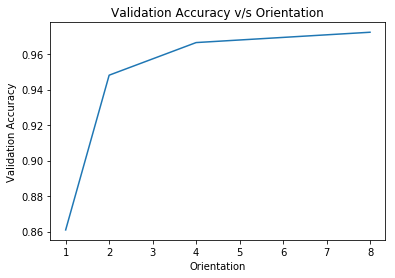

In [87]:
plt.plot(C,B)
plt.xlabel('Orientation')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy v/s Orientation')
plt.show()

<div class="alert alert-block alert-info"> Problem 5.2 </div>

Fit the model with the optimal number of orientations to the full MNIST data set and estimate its accuracy on the MNIST test set


In [88]:
grad_features = mnist.ImageFeatureModel(model_LGDC, 4, 8)

In [90]:
grad_features.fit(images,labels)

2019-11-06 22:53:01|	0: TRAIN loss 2.2881,  acc 0.1300
2019-11-06 22:53:02|	10: TRAIN loss 0.1668,  acc 0.9540
2019-11-06 22:53:04|	20: TRAIN loss 0.1248,  acc 0.9660
2019-11-06 22:53:05|	30: TRAIN loss 0.1214,  acc 0.9710
2019-11-06 22:53:07|	40: TRAIN loss 0.0848,  acc 0.9850
2019-11-06 22:53:09|	50: TRAIN loss 0.1157,  acc 0.9660
2019-11-06 22:53:10|	60: TRAIN loss 0.1164,  acc 0.9640
2019-11-06 22:53:12|	70: TRAIN loss 0.1031,  acc 0.9700
2019-11-06 22:53:13|	80: TRAIN loss 0.0974,  acc 0.9700
2019-11-06 22:53:15|	90: TRAIN loss 0.0846,  acc 0.9760
2019-11-06 22:53:16|	99: TRAIN loss 0.0864,  acc 0.9730


In [91]:
pred_labels = grad_features.predict(test_images)

In [92]:
print("Test Accuracy ",np.mean(pred_labels==test_labels))

Test Accuracy  0.977
